In [1]:
%matplotlib inline
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cubedsphere as cs  # https://github.com/JiaweiZhuang/cubedsphere

In [2]:
%time grid = cs.csgrid_GMAO(180)

CPU times: user 24.7 s, sys: 36.2 ms, total: 24.8 s
Wall time: 24.7 s


In [3]:
!aws s3 ls s3://gchp-output/aws/

                           PRE c180_7days_N32n1152_4x5met/
                           PRE c180_7days_N8n288_0.25met/
                           PRE c180_7days_N8n288_0.25met_emis_on/


In [4]:
ls ./gchp-output/aws/

c180_7days_N8n288_0.25met_emis_on/


In [5]:
ls ./gchp-output/pleiades/

c180_7days_n288_0.25met/


In [6]:
ds_aws = xr.open_dataset(
    "./gchp-output/aws/c180_7days_N8n288_0.25met_emis_on/"
    "GCHP.SpeciesConc.20160708_0000z.nc4")

ds_nas = xr.open_dataset(
    "./gchp-output/pleiades/c180_7days_n288_0.25met/"
    "GCHP.SpeciesConc.20160708_0000z.nc4")

# Point-wise agreement

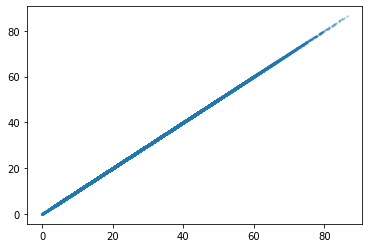

In [11]:
var = 'SpeciesConc_O3'

plt.scatter(ds_aws[var].isel(time=0, lev=0) * 1e9, 
            ds_nas[var].isel(time=0, lev=0) * 1e9,
           alpha=0.3, s=2)

# Surface level plot

In [13]:
# get data at one level and reshape to 6 cubed-sphere panels
data = ds_aws['SpeciesConc_O3'].isel(time=0, lev=0).data.reshape(6, 180, 180)

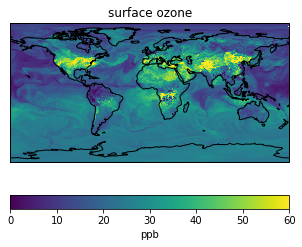

In [14]:
fig = plt.figure(figsize=[5, 4])
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

im = cs.plotCS_quick_raw(
    grid['lon_b'], grid['lat_b'],
    data * 1e9, grid['lon'], ax, cmap='viridis', masksize=1, vmax=60, vmin=0)
cbar = fig.colorbar(im, orientation='horizontal')
cbar.set_label('ppb')

plt.title('surface ozone');

0 1 2 3 4 5 

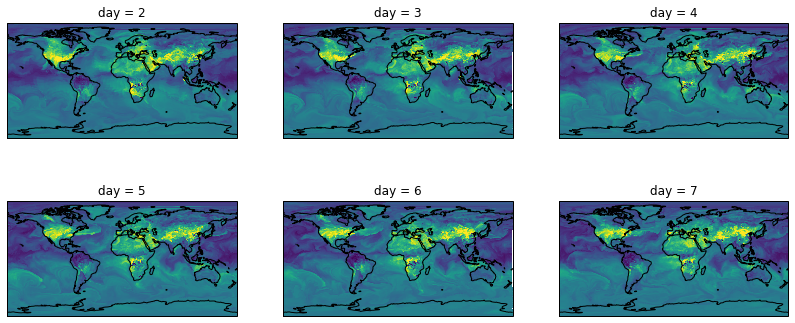

In [17]:
fig, axes = plt.subplots(2, 3, figsize=(14, 6), subplot_kw=dict(projection=ccrs.PlateCarree()))

for i in range(6):
    print(i, end=' ')
    ds = xr.open_dataset(
        # "./gchp-output/aws/c180_7days_N8n288_0.25met_emis_on/"
        "./gchp-output/pleiades/c180_7days_n288_0.25met/"
        "GCHP.SpeciesConc.2016070{}_0000z.nc4".format(i+2)
    )
    data = ds['SpeciesConc_O3'].isel(time=0, lev=0).data.reshape(6, 180, 180)
    
    ax = axes.flatten()[i]
    ax.coastlines()
    
    im = cs.plotCS_quick_raw(
        grid['lon_b'], grid['lat_b'],
        data * 1e9, grid['lon'], ax, cmap='viridis', masksize=1, vmax=60, vmin=0)
    ax.set_title('day = {}'.format(i+2))